In [5]:
#importing libraries
from __future__ import division
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from itertools import cycle
import itertools
import warnings

%matplotlib inline

In [6]:
#Supressing the warning
warnings.filterwarnings("ignore", message="X does not have valid feature names")

#reading csv
data = pd.read_csv("creditcard.csv")
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [7]:
# Number of data points in the minority class
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

# Picking the indices of the normal classes
normal_indices = data[data.Class == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/float(len(under_sample_data)))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/float(len(under_sample_data)))
print("Total number of transactions in resampled data: ", len(under_sample_data))



# split whole dataset into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Number transactions whole train dataset: ", len(X_train))
print("Number transactions whole test dataset: ", len(X_test))
print("Total number of whole transactions: ", len(X_train)+len(X_test))


# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("")
print("Number transactions undersample train dataset: ", len(X_train_undersample))
print("Number transactions undersample test dataset: ", len(X_test_undersample))
print("Total number of undersample transactions: ", len(X_train_undersample)+len(X_test_undersample))

print(" ")
print(" ")
print("Knn :")
print(" ")
print(" ")
c_param_range = [1,2,3,4,5]
knn = neighbors.KNeighborsClassifier(weights="uniform")
clf = GridSearchCV(knn, {"n_neighbors": c_param_range}, cv=5, scoring='recall')
clf.fit(X_train_undersample,y_train_undersample.values.ravel())

print ("Best parameters set found on development set:")
print (clf.best_params_)
print()
print ("Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print ("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984
Number transactions whole train dataset:  199364
Number transactions whole test dataset:  85443
Total number of whole transactions:  284807

Number transactions undersample train dataset:  688
Number transactions undersample test dataset:  296
Total number of undersample transactions:  984
 
 
Knn :
 
 
Best parameters set found on development set:
{'n_neighbors': 1}

Grid scores on development set:
nan (+/-nan) for {'n_neighbors': 1}
nan (+/-nan) for {'n_neighbors': 2}
nan (+/-nan) for {'n_neighbors': 3}
nan (+/-nan) for {'n_neighbors': 4}
nan (+/-nan) for {'n_neighbors': 5}


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset:  0.9115646258503401


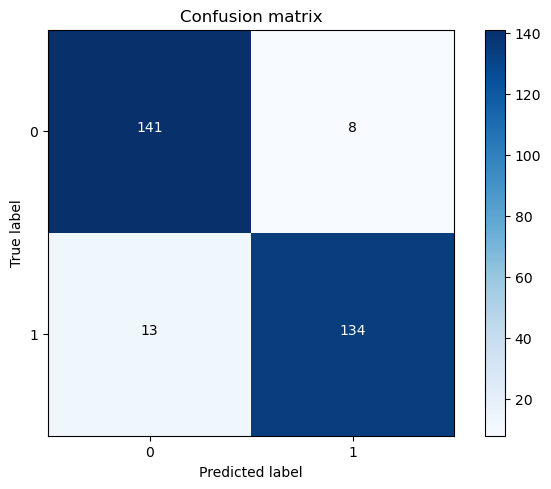

In [9]:
# Compute confusion matrix for unsampled data
k = clf.best_params_["n_neighbors"]
knn = neighbors.KNeighborsClassifier(k,weights="uniform")
knn.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = knn.predict(X_test_undersample.values)

cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')

plt.show()

Recall metric in the testing dataset:  0.7891156462585034


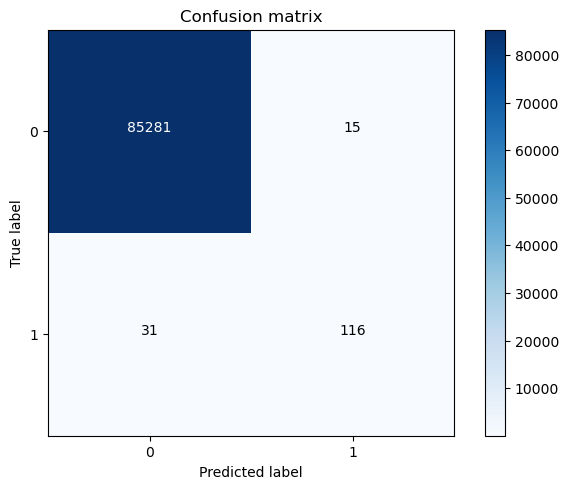

In [10]:
#confusion matrix for testing data
k = clf.best_params_["n_neighbors"]
knn = neighbors.KNeighborsClassifier(k,weights="uniform")
knn.fit(X_train,y_train.values.ravel())
y_pred = knn.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Recall metric in the whole testing dataset for threshold 0.1: 0.9115646258503401
Recall metric in the whole testing dataset for threshold 0.2: 0.9115646258503401


C:\Users\corer\AppData\Local\Temp\ipykernel_24936\2573763466.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Recall metric in the whole testing dataset for threshold 0.3: 0.9115646258503401


C:\Users\corer\AppData\Local\Temp\ipykernel_24936\2573763466.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Recall metric in the whole testing dataset for threshold 0.4: 0.9115646258503401


C:\Users\corer\AppData\Local\Temp\ipykernel_24936\2573763466.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Recall metric in the whole testing dataset for threshold 0.5: 0.9115646258503401


C:\Users\corer\AppData\Local\Temp\ipykernel_24936\2573763466.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Recall metric in the whole testing dataset for threshold 0.6: 0.9115646258503401


C:\Users\corer\AppData\Local\Temp\ipykernel_24936\2573763466.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Recall metric in the whole testing dataset for threshold 0.7: 0.9115646258503401


C:\Users\corer\AppData\Local\Temp\ipykernel_24936\2573763466.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Recall metric in the whole testing dataset for threshold 0.8: 0.9115646258503401


C:\Users\corer\AppData\Local\Temp\ipykernel_24936\2573763466.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Recall metric in the whole testing dataset for threshold 0.9: 0.9115646258503401


C:\Users\corer\AppData\Local\Temp\ipykernel_24936\2573763466.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


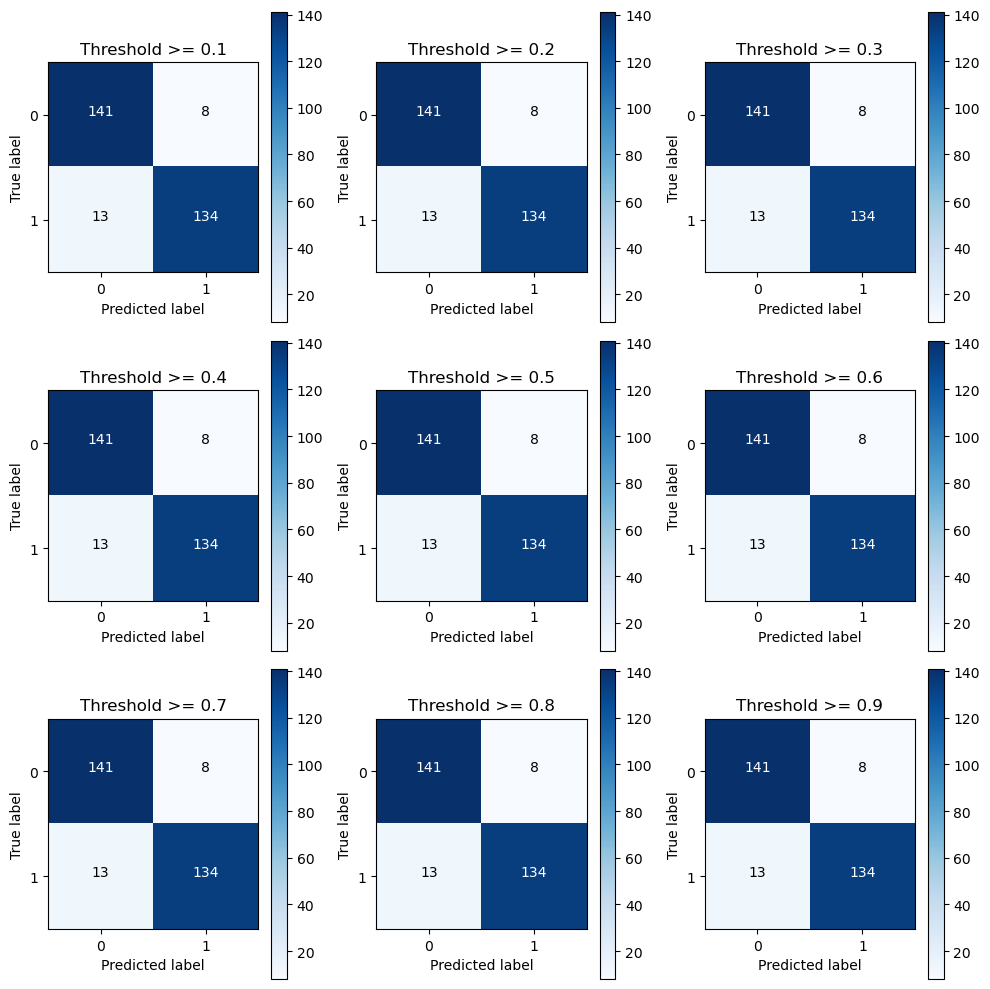

In [11]:
#threshold 
k = clf.best_params_["n_neighbors"]
knn = neighbors.KNeighborsClassifier(k,weights="uniform")
knn.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = knn.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print ("Recall metric in the whole testing dataset for threshold {}: {}".format(i, cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

 

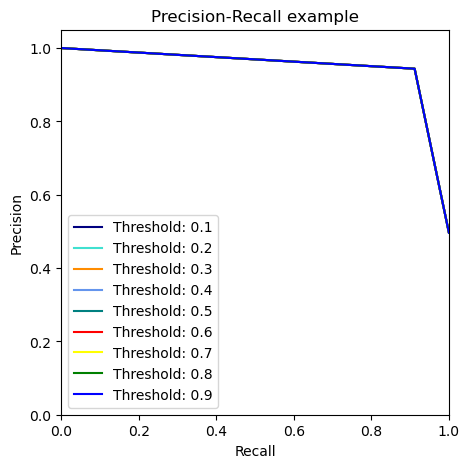

In [12]:
#precision-recall curve
k = clf.best_params_["n_neighbors"]
knn = neighbors.KNeighborsClassifier(k,weights="uniform")
knn.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = knn.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

plt.figure(figsize=(5,5))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = y_pred_undersample_proba[:,1] > i
    
    precision, recall, thresholds = precision_recall_curve(y_test_undersample,y_test_predictions_prob)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s'%i)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall example')
    plt.legend(loc="lower left")

In [13]:
print("Decision Tree :")
print(" ")
print(" ")
c_param_range = [3,4,5,6,7]
clf = GridSearchCV(DecisionTreeClassifier(random_state = 0), {"max_depth": c_param_range}, cv=5, scoring='recall')
clf.fit(X_train_undersample,y_train_undersample.values.ravel())

print ("Best parameters set found on development set:")
print (clf.best_params_)
print()
print ("Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print ("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Decision Tree :
 
 
Best parameters set found on development set:
{'max_depth': 3}

Grid scores on development set:
0.907 (+/-0.043) for {'max_depth': 3}
0.899 (+/-0.052) for {'max_depth': 4}
0.899 (+/-0.055) for {'max_depth': 5}
0.907 (+/-0.062) for {'max_depth': 6}
0.904 (+/-0.060) for {'max_depth': 7}


Recall metric in the testing dataset:  0.9319727891156463


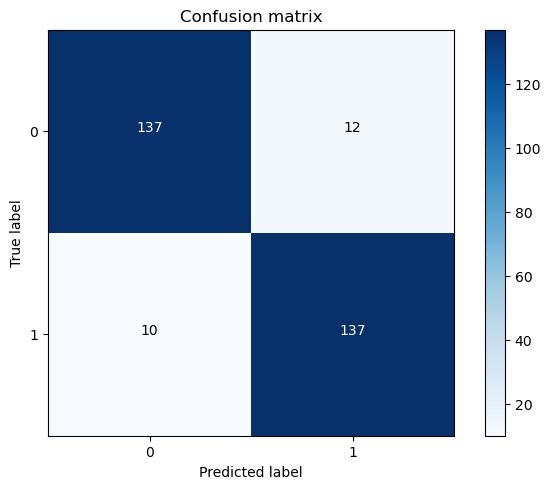

In [14]:
#first confusion matrix
k = clf.best_params_["max_depth"]
decision_tree = DecisionTreeClassifier(max_depth = k,random_state = 0)
decision_tree.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = decision_tree.predict(X_test_undersample.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()


Recall metric in the testing dataset:  0.7346938775510204


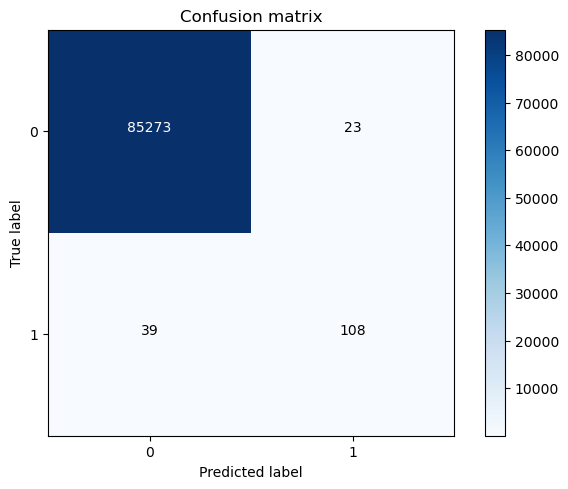

In [15]:
#second confusion matrix
k = clf.best_params_["max_depth"]
decision_tree = DecisionTreeClassifier(max_depth = k,random_state = 0)
decision_tree.fit(X_train,y_train.values.ravel())
y_pred = decision_tree.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()


Recall metric in the undersample testing dataset for threshold 0.1: 0.9591836734693877
Recall metric in the undersample testing dataset for threshold 0.2: 0.9319727891156463


C:\Users\corer\AppData\Local\Temp\ipykernel_24936\2573763466.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Recall metric in the undersample testing dataset for threshold 0.3: 0.9319727891156463


C:\Users\corer\AppData\Local\Temp\ipykernel_24936\2573763466.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Recall metric in the undersample testing dataset for threshold 0.4: 0.9319727891156463


C:\Users\corer\AppData\Local\Temp\ipykernel_24936\2573763466.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Recall metric in the undersample testing dataset for threshold 0.5: 0.9319727891156463


C:\Users\corer\AppData\Local\Temp\ipykernel_24936\2573763466.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Recall metric in the undersample testing dataset for threshold 0.6: 0.9183673469387755


C:\Users\corer\AppData\Local\Temp\ipykernel_24936\2573763466.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Recall metric in the undersample testing dataset for threshold 0.7: 0.8707482993197279


C:\Users\corer\AppData\Local\Temp\ipykernel_24936\2573763466.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Recall metric in the undersample testing dataset for threshold 0.8: 0.8707482993197279


C:\Users\corer\AppData\Local\Temp\ipykernel_24936\2573763466.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Recall metric in the undersample testing dataset for threshold 0.9: 0.8707482993197279


C:\Users\corer\AppData\Local\Temp\ipykernel_24936\2573763466.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


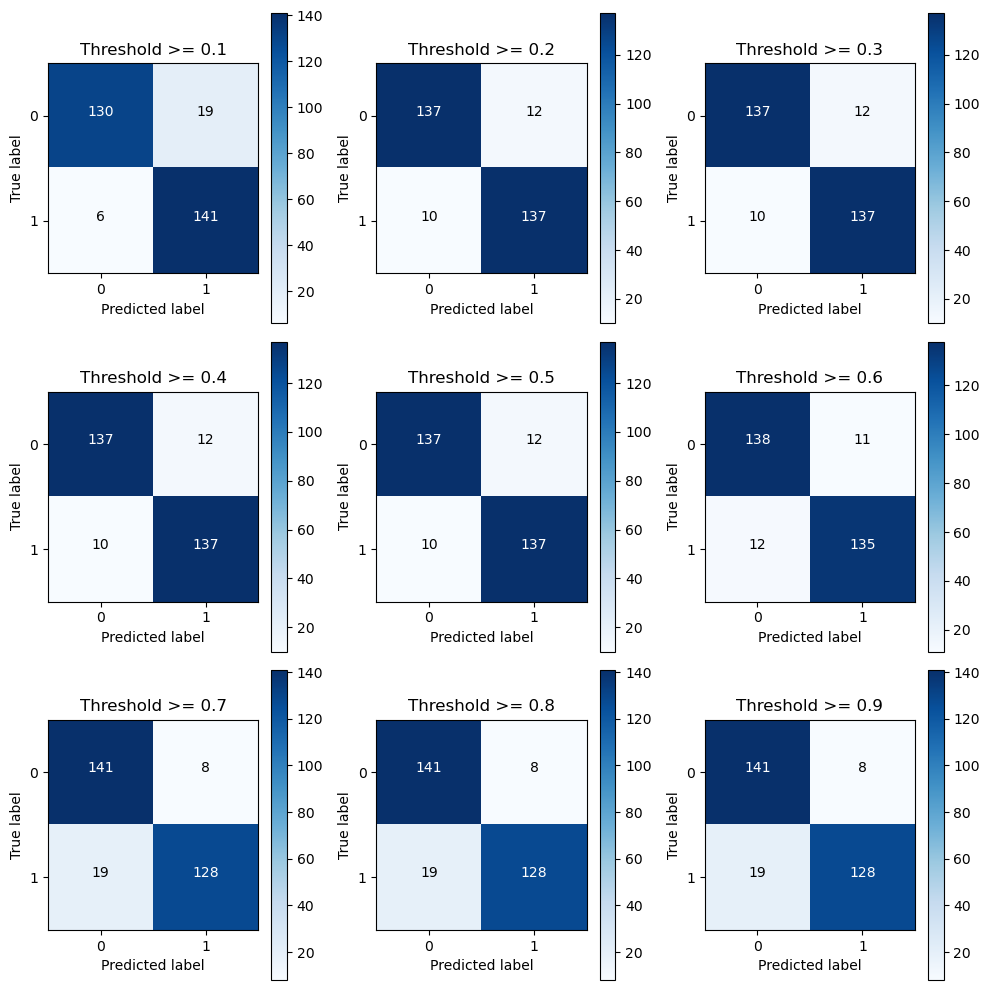

In [16]:
#thrshold
k = clf.best_params_["max_depth"]
decision_tree = DecisionTreeClassifier(max_depth = k,random_state = 0)
decision_tree.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = decision_tree.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print ("Recall metric in the undersample testing dataset for threshold {}: {}".format(i, cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 
 

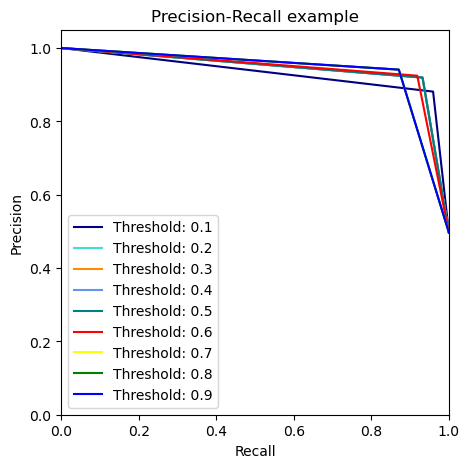

In [17]:
#precision recall curve
k = clf.best_params_["max_depth"]
decision_tree = DecisionTreeClassifier(max_depth = k,random_state = 0)
decision_tree.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = decision_tree.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

plt.figure(figsize=(5,5))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = y_pred_undersample_proba[:,1] > i
    
    precision, recall, thresholds = precision_recall_curve(y_test_undersample,y_test_predictions_prob)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s'%i)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall example')
    plt.legend(loc="lower left")

In [18]:
#Random Forest
print("Random Forest:")
print(" ")
c_param_range = [5,10,20,50]
clf = GridSearchCV(RandomForestClassifier(random_state = 0), {"n_estimators": c_param_range}, cv=5, scoring='recall')
clf.fit(X_train_undersample,y_train_undersample.values.ravel())

print ("Best parameters set found on development set:")
print (clf.best_params_)
print()
print ("Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print ("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Random Forest:
 
Best parameters set found on development set:
{'n_estimators': 5}

Grid scores on development set:
0.913 (+/-0.058) for {'n_estimators': 5}
0.896 (+/-0.059) for {'n_estimators': 10}
0.899 (+/-0.055) for {'n_estimators': 20}
0.904 (+/-0.062) for {'n_estimators': 50}


Recall metric in the testing dataset:  0.9183673469387755


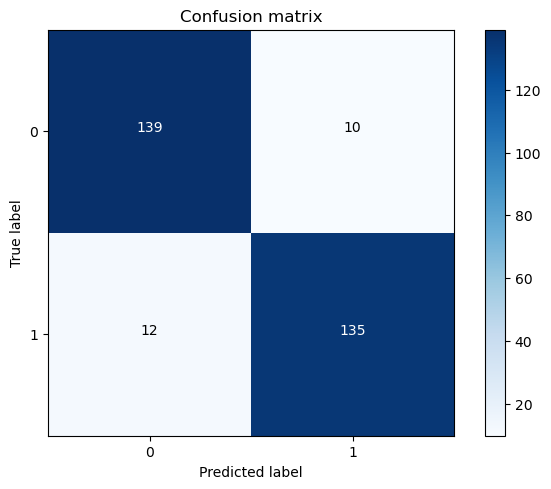

In [19]:
#first confusion matrix
r = clf.best_params_["n_estimators"]
random_forest = RandomForestClassifier(r,random_state = 0)
random_forest.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = random_forest.predict(X_test_undersample.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()


Recall metric in the testing dataset:  0.7482993197278912


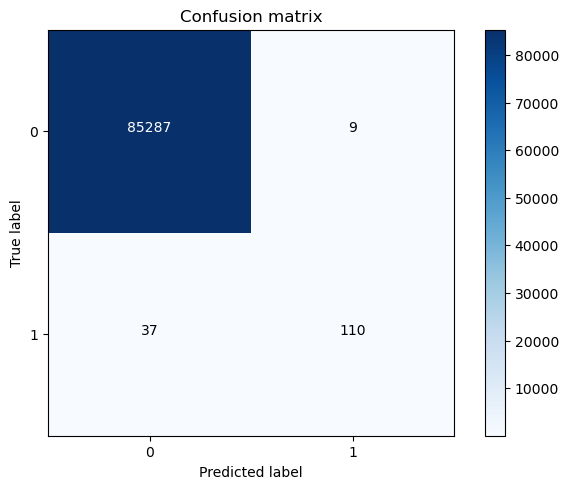

In [20]:
#second confusion matrix
k = clf.best_params_["n_estimators"]
random_forest = RandomForestClassifier(r,random_state = 0)
random_forest.fit(X_train,y_train.values.ravel())
y_pred = random_forest.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()


Recall metric in the undersample testing dataset for threshold 0.1: 0.9863945578231292
Recall metric in the undersample testing dataset for threshold 0.2: 0.9455782312925171


C:\Users\corer\AppData\Local\Temp\ipykernel_24936\2573763466.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Recall metric in the undersample testing dataset for threshold 0.3: 0.9455782312925171


C:\Users\corer\AppData\Local\Temp\ipykernel_24936\2573763466.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Recall metric in the undersample testing dataset for threshold 0.4: 0.9183673469387755


C:\Users\corer\AppData\Local\Temp\ipykernel_24936\2573763466.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Recall metric in the undersample testing dataset for threshold 0.5: 0.9183673469387755


C:\Users\corer\AppData\Local\Temp\ipykernel_24936\2573763466.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Recall metric in the undersample testing dataset for threshold 0.6: 0.8843537414965986


C:\Users\corer\AppData\Local\Temp\ipykernel_24936\2573763466.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Recall metric in the undersample testing dataset for threshold 0.7: 0.8843537414965986


C:\Users\corer\AppData\Local\Temp\ipykernel_24936\2573763466.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Recall metric in the undersample testing dataset for threshold 0.8: 0.8095238095238095


C:\Users\corer\AppData\Local\Temp\ipykernel_24936\2573763466.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Recall metric in the undersample testing dataset for threshold 0.9: 0.8095238095238095


C:\Users\corer\AppData\Local\Temp\ipykernel_24936\2573763466.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


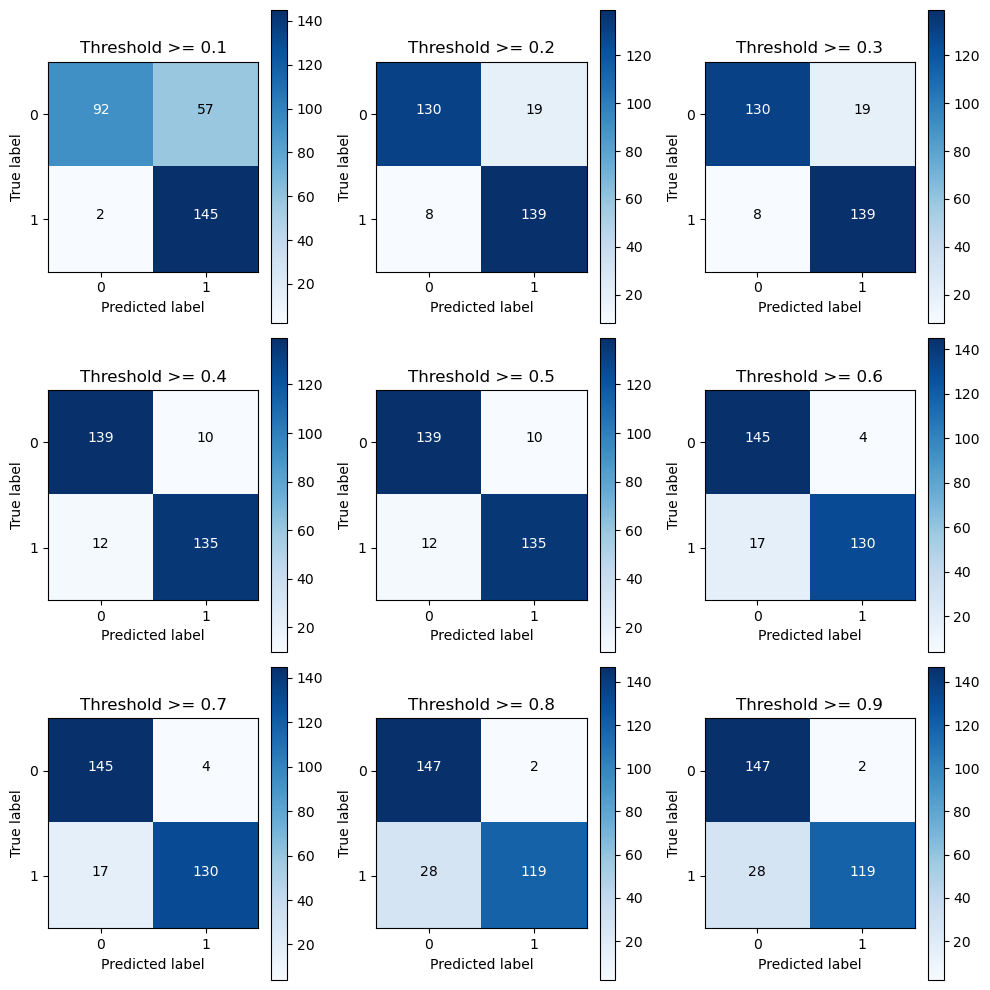

In [21]:
#threshold
k = clf.best_params_["n_estimators"]
random_forest = RandomForestClassifier(r,random_state = 0)
random_forest.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = random_forest.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print ("Recall metric in the undersample testing dataset for threshold {}: {}".format(i, cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 
 

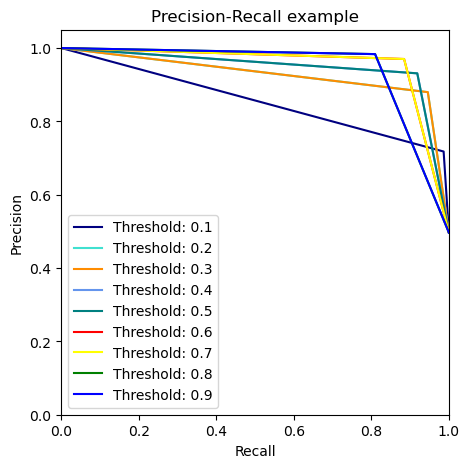

In [22]:
#precision recall curve
k = clf.best_params_["n_estimators"]
random_forest = RandomForestClassifier(r,random_state = 0)
random_forest.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = random_forest.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

plt.figure(figsize=(5,5))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = y_pred_undersample_proba[:,1] > i
    
    precision, recall, thresholds = precision_recall_curve(y_test_undersample,y_test_predictions_prob)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s'%i)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall example')
    plt.legend(loc="lower left")
    plt.savefig('Image_14.png')